## Morphological Calls(63x) by Post Patch Outcomes

##### Date: 4/03/18 Updated 63x.csv & shiny.csv

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import pg8000          #pg8000 access SQL databases
import pandas as pd    #pandas will be needed to work in a dataframe

from IPython.display import display #Found this to display all columns in a table

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style('whitegrid')
sns.set_context('notebook')

#Context: paper
#Context: notebook
#Context: talk
#Context: poster

##### postpatch_func.py by Rusty from Stash 

In [2]:
def nucleated(x):
    nuc_high_seal = x[(x['anno.postPatch_label'] == 'Nucleated') | 
                      (((x['anno.postPatch_label'] == 'nucleus_visible') | 
                      (x['anno.postPatch_label'] == 'nucleus_present')) & 
                      (x['anno.endPipetteR_label'] >= 500))]
    return nuc_high_seal

def partial_nucleated(y):
    nuc_low_seal = y[(y['anno.postPatch_label'] == 'Partial-Nucleus') | 
                     (((y['anno.postPatch_label'] == 'nucleus_present') | 
                     (y['anno.postPatch_label'] == 'nucleus_visible')) & 
                     (y["anno.endPipetteR_label"] <= 499))]
    return nuc_low_seal

def outside_out(z):
    no_high_seal = z[(z['anno.postPatch_label'] == 'Outside-Out') | 
                     (((z['anno.postPatch_label'] == 'nucleus_absent') | 
                     (z['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                     (z['anno.endPipetteR_label'] >= 500))]
    return no_high_seal

def no_seal(w): 
    no_low_seal = w[(w['anno.postPatch_label'] == 'No-Seal') | 
                    (((w['anno.postPatch_label'] == 'nucleus_absent') | 
                    (w['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                    (w['anno.endPipetteR_label'] <= 499))]
    return no_low_seal
    
def entire_cell(v):
    entire = v[(v['anno.postPatch_label'] == 'Entire-Cell') | 
               (v['anno.postPatch_label'] == 'entire_cell')]
    return entire

#variable['post_patch'] = 'Term'
#Term is an output displayed in the Post_Patch column

def reclassify(df):
    nu = nucleated(df)
    nu['post_patch'] = 'Nuc-high seal' 
    oo = outside_out(df)
    oo['post_patch'] = 'No-high seal'
    pn = partial_nucleated(df)
    pn['post_patch'] = 'Nuc-low seal'
    ns = no_seal(df)
    ns['post_patch'] = 'No-low seal'
    ec = entire_cell(df)
    ec['post_patch'] = 'Entire cell'
    return  nu, oo, pn, ns, ec

def concat_df(a, b, c, d, e):
    frames = (a, b, c, d, e)
    df = pd.concat(frames)
    return df

def postpatch_reclass(df):
    return concat_df(*reclassify(df))

#final_df = postpatch_reclass(final_df)

##### Reads 63x.csv & shiny.csv

In [3]:
morph_df = pd.read_csv("63x.csv")
shiny_df = pd.read_csv("shiny.csv")

##### Creating shiny_df from shiny.csv

In [4]:
shiny_initial = ['anno.sample_id',
                 'anno.postPatch_label',
                 'anno.endPipetteR_label']
shiny_df = shiny_df[shiny_initial]
shiny_df.head()

,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
0,P1S4_160318_069_A01,O/O,0.0
1,P1S4_160407_108_A01,nucleated patch,0.0
2,P1S4_160407_109_A01,partial nucleus,0.0
3,P1S4_160407_112_A01,o/o,0.0
4,P1S4_160407_113_A01,0,0.0


##### Creating morph_df from 63x.csv

In [5]:
morph_initial = ['patched_cell_container',
                 'ims63x_go_no_go',
                 'project']
morph_df = morph_df[morph_initial]
morph_df.tail()

,patched_cell_container,ims63x_go_no_go,project
6120,P2S4_180109_052_A01,NaN,mIVSCC-MET
6121,PAS4_180109_452_A01,NaN,mIVSCC-MET
6122,P8S4_180110_353_A01,NaN,mIVSCC-MET
6123,P8S4_180110_354_A01,63x no go,mIVSCC-MET
6124,PAS4_180110_454_A01,NaN,mIVSCC-MET


##### Merging morph_df with shiny_lims_df to create final_df

In [6]:
#Inner merge = contains only matching data of both morph_df and shiny_df

final_df = pd.merge(left = morph_df, 
                    right = shiny_df, 
                    left_on = 'patched_cell_container', 
                    right_on = 'anno.sample_id', 
                    how = 'inner')

In [7]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
0,P8S4_180103_351_A01,NaN,mIVSCC-MET,P8S4_180103_351_A01,nucleus_absent,35.0
1,P8S4_180103_352_A01,63x no go,mIVSCC-MET,P8S4_180103_352_A01,nucleus_present,8.5
2,P1S4_160517_001_A01,NaN,T301x,P1S4_160517_001_A01,Partial nucleus,0.0
3,P1S4_160517_003_A01,NaN,T301x,P1S4_160517_003_A01,o/o,0.0
4,P1S4_160517_004_A01,NaN,T301x,P1S4_160517_004_A01,o/o,0.0


##### Creating Date column using patched_cell_container column

In [8]:
final_df['Date'] = final_df['patched_cell_container'].str[5:11]

In [9]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Date
2675,P2S4_180109_052_A01,NaN,mIVSCC-MET,P2S4_180109_052_A01,nucleus_present,1000.0,180109
2676,PAS4_180109_452_A01,NaN,mIVSCC-MET,PAS4_180109_452_A01,nucleus_present,1500.0,180109
2677,P8S4_180110_353_A01,NaN,mIVSCC-MET,P8S4_180110_353_A01,nucleus_absent,100.0,180110
2678,P8S4_180110_354_A01,63x no go,mIVSCC-MET,P8S4_180110_354_A01,nucleus_present,1000.0,180110
2679,PAS4_180110_454_A01,NaN,mIVSCC-MET,PAS4_180110_454_A01,nucleus_present,1000.0,180110


##### Indexing Date column then sorting by date index

In [10]:
final_df = final_df.set_index('Date')
final_df = final_df.sort_index()

In [11]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
160510,P1S4_160510_455_A01,NaN,T301x,P1S4_160510_455_A01,0,0.0
160511,P1S4_160511_473_A01,NaN,T301x,P1S4_160511_473_A01,0,0.0
160511,P1S4_160511_472_A01,NaN,T301x,P1S4_160511_472_A01,Partial nucleus,0.0
160511,P1S4_160511_471_A01,NaN,T301x,P1S4_160511_471_A01,0,0.0
160512,P1S4_160512_485_A01,NaN,T301x,P1S4_160512_485_A01,o/o,0.0


In [12]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
180221,P2S4_180221_052_A01,NaN,mIVSCC-MET,P2S4_180221_052_A01,nucleus_absent,10.0
180221,P8S4_180221_353_A01,NaN,mIVSCC-MET,P8S4_180221_353_A01,nucleus_present,100.0
180221,P8S4_180221_352_A01,NaN,mIVSCC-MET,P8S4_180221_352_A01,nucleus_present,400.0
180221,P9S4_180221_401_A01,NaN,mIVSCC-MET,P9S4_180221_401_A01,nucleus_present,2500.0
180221,P1S4_180221_001_A01,NaN,mIVSCC-MET,P1S4_180221_001_A01,nucleus_present,3000.0


##### final_df start at production date to present date

In [13]:
final_df = final_df['170901':]

In [14]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
170901,P8S4_170901_355_A01,63x go,T301x,P8S4_170901_355_A01,No-Seal,0.0
170901,P2S4_170901_051_A01,63x go,T301x,P2S4_170901_051_A01,Nucleated,0.0
170901,P8S4_170901_353_A01,63x no go,T301x,P8S4_170901_353_A01,No-Seal,0.0
170901,P2S4_170901_054_A01,63x go,T301x,P2S4_170901_054_A01,Partial-Nucleus,0.0
170901,P2S4_170901_052_A01,63x go,T301x,P2S4_170901_052_A01,Nucleated,0.0


In [15]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
180221,P2S4_180221_052_A01,NaN,mIVSCC-MET,P2S4_180221_052_A01,nucleus_absent,10.0
180221,P8S4_180221_353_A01,NaN,mIVSCC-MET,P8S4_180221_353_A01,nucleus_present,100.0
180221,P8S4_180221_352_A01,NaN,mIVSCC-MET,P8S4_180221_352_A01,nucleus_present,400.0
180221,P9S4_180221_401_A01,NaN,mIVSCC-MET,P9S4_180221_401_A01,nucleus_present,2500.0
180221,P1S4_180221_001_A01,NaN,mIVSCC-MET,P1S4_180221_001_A01,nucleus_present,3000.0


##### Renaming Columns

In [16]:
#Duration columns are in seconds
final_df.rename(columns = {'ims63x_go_no_go' : 'morphology'}, inplace = True)

In [17]:
final_df.head()

,patched_cell_container,morphology,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
170901,P8S4_170901_355_A01,63x go,T301x,P8S4_170901_355_A01,No-Seal,0.0
170901,P2S4_170901_051_A01,63x go,T301x,P2S4_170901_051_A01,Nucleated,0.0
170901,P8S4_170901_353_A01,63x no go,T301x,P8S4_170901_353_A01,No-Seal,0.0
170901,P2S4_170901_054_A01,63x go,T301x,P2S4_170901_054_A01,Partial-Nucleus,0.0
170901,P2S4_170901_052_A01,63x go,T301x,P2S4_170901_052_A01,Nucleated,0.0


In [18]:
final_df.tail()

,patched_cell_container,morphology,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
180221,P2S4_180221_052_A01,NaN,mIVSCC-MET,P2S4_180221_052_A01,nucleus_absent,10.0
180221,P8S4_180221_353_A01,NaN,mIVSCC-MET,P8S4_180221_353_A01,nucleus_present,100.0
180221,P8S4_180221_352_A01,NaN,mIVSCC-MET,P8S4_180221_352_A01,nucleus_present,400.0
180221,P9S4_180221_401_A01,NaN,mIVSCC-MET,P9S4_180221_401_A01,nucleus_present,2500.0
180221,P1S4_180221_001_A01,NaN,mIVSCC-MET,P1S4_180221_001_A01,nucleus_present,3000.0


##### Adding post_patch column to the end of final_df

In [19]:
final_df = postpatch_reclass(final_df)
final_df.tail()

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,patched_cell_container,morphology,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,post_patch
Date,,,,,,,
180124,P9S4_180124_405_A01,NaN,mIVSCC-MET,P9S4_180124_405_A01,entire_cell,4.0,Entire cell
180126,P9S4_180126_404_A01,NaN,mIVSCC-MET,P9S4_180126_404_A01,entire_cell,11.5,Entire cell
180205,P1S4_180205_003_A01,63x no go,mIVSCC-MET,P1S4_180205_003_A01,entire_cell,5.0,Entire cell
180207,P1S4_180207_003_A01,NaN,mIVSCC-MET,P1S4_180207_003_A01,entire_cell,3.0,Entire cell
180220,PAS4_180220_451_A01,NaN,mIVSCC-MET,PAS4_180220_451_A01,entire_cell,5.7,Entire cell


##### Dropping columns 

In [20]:
final_df.drop(['patched_cell_container', 'project', 'anno.sample_id'], axis=1, inplace=True)
final_df.head()

,morphology,anno.postPatch_label,anno.endPipetteR_label,post_patch
Date,,,,
170901,63x go,Nucleated,0.0,Nuc-high seal
170901,63x go,Nucleated,0.0,Nuc-high seal
170901,NaN,Nucleated,0.0,Nuc-high seal
170901,63x no go,Nucleated,0.0,Nuc-high seal
170906,63x go,Nucleated,0.0,Nuc-high seal


In [21]:
final_df.tail()

,morphology,anno.postPatch_label,anno.endPipetteR_label,post_patch
Date,,,,
180124,NaN,entire_cell,4.0,Entire cell
180126,NaN,entire_cell,11.5,Entire cell
180205,63x no go,entire_cell,5.0,Entire cell
180207,NaN,entire_cell,3.0,Entire cell
180220,NaN,entire_cell,5.7,Entire cell


##### Filters columns that have NaN

In [22]:
final_df.dropna(subset = ['morphology', 'anno.endPipetteR_label'], inplace = True)

In [23]:
final_df.head()

,morphology,anno.postPatch_label,anno.endPipetteR_label,post_patch
Date,,,,
170901,63x go,Nucleated,0.0,Nuc-high seal
170901,63x go,Nucleated,0.0,Nuc-high seal
170901,63x no go,Nucleated,0.0,Nuc-high seal
170906,63x go,Nucleated,0.0,Nuc-high seal
170906,63x no go,Nucleated,0.0,Nuc-high seal


In [24]:
final_df.tail()

,morphology,anno.postPatch_label,anno.endPipetteR_label,post_patch
Date,,,,
171101,63x no go,entire_cell,3.5,Entire cell
171102,63x go,entire_cell,200.0,Entire cell
171116,63x go,entire_cell,1000.0,Entire cell
171211,63x no go,entire_cell,2000.0,Entire cell
180205,63x no go,entire_cell,5.0,Entire cell


In [25]:
#Categorical
final_df['morphology'] = final_df['morphology'].astype('category')
final_df['post_patch'] = final_df['post_patch'].astype('category')

#Numerical
#final_df['anno.endPipetteR_label'] = final_df['anno.endPipetteR_label'].astype('float')

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 170901 to 180205
Data columns (total 4 columns):
morphology                891 non-null category
anno.postPatch_label      891 non-null object
anno.endPipetteR_label    891 non-null float64
post_patch                891 non-null category
dtypes: category(2), float64(1), object(1)
memory usage: 22.9+ KB


### Plot: Morphological Calls(63x) by Post Patch Outcomes

Text(0.5,1,u'Count of Morphological Calls by Post Patch Outcomes')

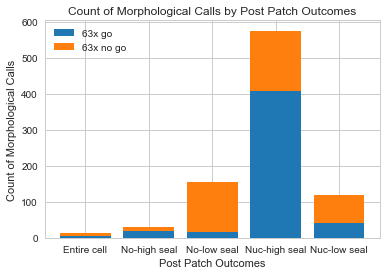

In [27]:
x = ['Nuc-high seal', 'No-high seal', 'Nuc-low seal', 'No-low seal', 'Entire cell']
morph = ['63x go', '63x no go']
#color = ["r", "g"]

bottom = np.zeros(len(x))
y = np.zeros(len(x))
for mp in morph:
    bottom = bottom + y
    y = [len(final_df[(final_df['post_patch'] == f) & (final_df['morphology'] == mp)]) for f in x]
    plt.bar(x, y, bottom = bottom, label = mp)
    
plt.xlabel('Post Patch Outcomes')
plt.ylabel('Count of Morphological Calls')
plt.legend()
plt.title('Count of Morphological Calls by Post Patch Outcomes')
#plt.savefig("count_patch_duration_vs_morph")

## Extra Plots

In [28]:
final_df1 = final_df[['post_patch', 'morphology', 'anno.postPatch_label']]
final_df1.head()

,post_patch,morphology,anno.postPatch_label
Date,,,
170901,Nuc-high seal,63x go,Nucleated
170901,Nuc-high seal,63x go,Nucleated
170901,Nuc-high seal,63x no go,Nucleated
170906,Nuc-high seal,63x go,Nucleated
170906,Nuc-high seal,63x no go,Nucleated


In [29]:
final_df2 = final_df1.groupby(['post_patch', 'morphology']).count()

In [30]:
final_df2

anno.postPatch_label
post_patch    morphology                      
Entire cell   63x go                         4
              63x no go                      8
No-high seal  63x go                        18
              63x no go                     11
No-low seal   63x go                        17
              63x no go                    137
Nuc-high seal 63x go                       407
              63x no go                    169
Nuc-low seal  63x go                        41
              63x no go                     79

In [31]:
final_df2 = final_df2.rename(columns = {'anno.postPatch_label' : ''})

In [32]:
final_df2

post_patch    morphology     
Entire cell   63x go        4
              63x no go     8
No-high seal  63x go       18
              63x no go    11
No-low seal   63x go       17
              63x no go   137
Nuc-high seal 63x go      407
              63x no go   169
Nuc-low seal  63x go       41
              63x no go    79

In [33]:
final_df2.reset_index(inplace = True)

In [34]:
final_df2

,post_patch,morphology,
0,Entire cell,63x go,4
1,Entire cell,63x no go,8
2,No-high seal,63x go,18
3,No-high seal,63x no go,11
4,No-low seal,63x go,17
5,No-low seal,63x no go,137
6,Nuc-high seal,63x go,407
7,Nuc-high seal,63x no go,169
8,Nuc-low seal,63x go,41
9,Nuc-low seal,63x no go,79


In [35]:
final_df2 = final_df2.pivot_table(values=[''], 
                                  index=['post_patch'], 
                                  columns = ['morphology'], 
                                  aggfunc='sum')

In [36]:
final_df2

morphology    63x go 63x no go
post_patch                    
Entire cell        4         8
No-high seal      18        11
No-low seal       17       137
Nuc-high seal    407       169
Nuc-low seal      41        79

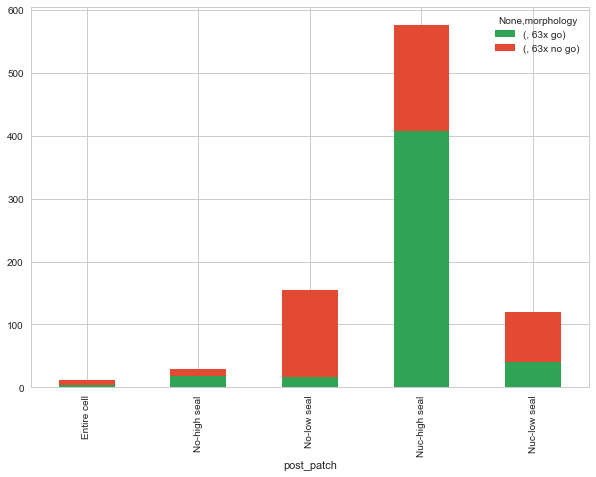

In [37]:
#Same Plot as Aaron's Method
my_colors = ['#31a354', '#e34a33']
final_df2.plot.bar(stacked=True, color = my_colors, figsize=(10,7))

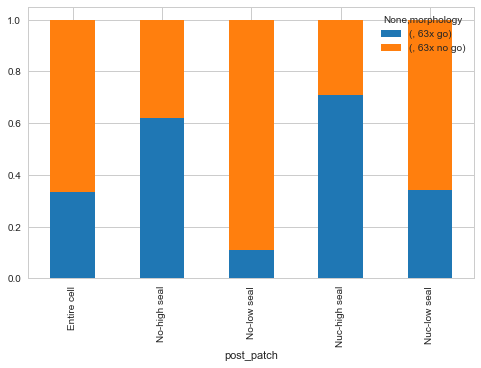

In [38]:
final_df2 = final_df2.div(final_df2.sum(1), axis=0)
final_df2.plot(kind = 'bar', stacked = True, figsize=(8,5))

In [39]:
final_df2 = final_df2.stack(level = 0)

In [40]:
final_df2

,morphology,63x go,63x no go
post_patch,,,
Entire cell,,0.333333,0.666667
No-high seal,,0.620690,0.379310
No-low seal,,0.110390,0.889610
Nuc-high seal,,0.706597,0.293403
Nuc-low seal,,0.341667,0.658333


In [41]:
final_df2['63x go'] = final_df2['63x go'] * 100
final_df2['63x no go'] = final_df2['63x no go'] * 100

In [42]:
final_df2

,morphology,63x go,63x no go
post_patch,,,
Entire cell,,33.333333,66.666667
No-high seal,,62.068966,37.931034
No-low seal,,11.038961,88.961039
Nuc-high seal,,70.659722,29.340278
Nuc-low seal,,34.166667,65.833333


Text(0,0.5,u'Percentage')

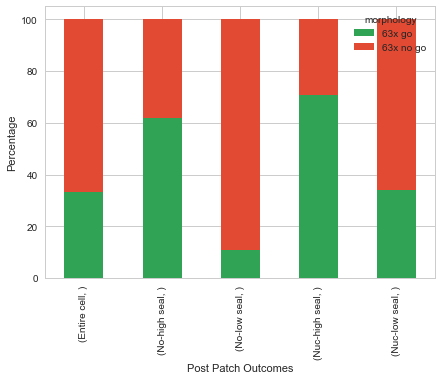

In [64]:
my_colors = ['#31a354', '#e34a33']
final_df2.plot(kind = 'bar', 
               stacked = True, 
               colors = my_colors, 
               figsize= (7,5))
plt.xlabel('Post Patch Outcomes')
plt.ylabel('Percentage')

Text(0,0.5,u'Post Patch Outcomes')

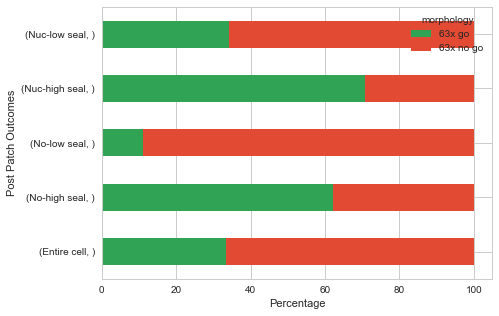

In [74]:
my_colors = ['#31a354', '#e34a33']
final_df2.plot(kind = 'barh', 
               stacked = True, 
               colors = my_colors, 
               figsize= (7,5))
plt.xlabel('Percentage')
plt.ylabel('Post Patch Outcomes')

In [44]:
#final_df.reset_index(inplace = True)
#final_df.head()

In [45]:
#final_df.reset_index(inplace = True)
#final_df.head()